In [35]:
from collections import deque

In [36]:
dq = deque(maxlen=10)
dq.append((2, 'two'))
dq.append((4, 'four'))
dq.append((5, 'five'))

temp = dq[-2]
temp = list(temp)
temp[0] = 3
temp = tuple(temp)

dq[1] = temp
print(temp)
print(dq)

(3, 'four')
deque([(2, 'two'), (3, 'four'), (5, 'five')], maxlen=10)


In [37]:
memory = deque(maxlen=10)
memory.append((1,2,3,4,5))
memory.append((6,7,8,9,10))
print(memory)
# print(memory[-1])
print(*memory)

deque([(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)], maxlen=10)
(1, 2, 3, 4, 5) (6, 7, 8, 9, 10)


In [38]:
state_before, action_chosen, reward_given, state_after, game_overs = memory[-1] # unpack into lists rather than tu

print(state_before)
print(action_chosen)

6
7


In [39]:
print(state_before)
print(action_chosen)

6
7


In [40]:
import pandas as pd
# import torch


In [41]:

df = pd.read_csv(r'C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\dataframes_output_test.csv')
# df[20:25]

In [42]:
df.head()

,Datetime,Timestep,Calling Point,zn0_temp,zn0_RH,electricity_facility,electricity_heating,zn0_heating_sp,oa_rh,oa_db,oa_pa,sun_up,rain,snow,wind_dir,wind_speed
0,2018-01-01 01:00:00,1,callback_begin_zone_timestep_before_set_curren...,20.000000,32.322090,0.000000e+00,0.000000e+00,0.0,91.0,3.7,95090.0,False,False,False,230.0,8.7
1,2018-01-01 01:30:00,1,callback_begin_zone_timestep_before_set_curren...,19.320456,33.248484,7.979455e+06,3.913816e+07,1.8,87.0,3.6,95079.0,False,False,True,250.0,9.3
2,2018-01-01 02:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.283770,33.270184,8.353683e+06,6.248610e+07,1.8,83.0,4.0,95095.0,False,False,True,250.0,9.3
3,2018-01-01 03:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.316825,33.140391,8.353423e+06,6.425469e+07,0.9,85.0,4.2,95050.0,False,False,True,240.0,12.9
4,2018-01-01 04:00:00,1,callback_begin_zone_timestep_before_set_curren...,19.326590,33.084614,7.979437e+06,6.263834e+07,0.2,90.0,4.2,94897.0,False,False,True,240.0,17.0


<Axes: xlabel='Datetime'>

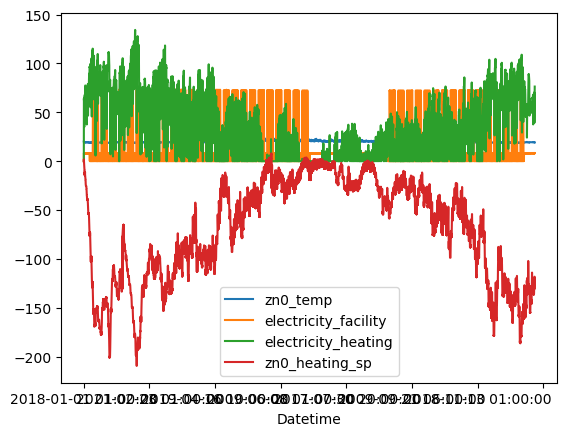

In [43]:
# df[20:30]
# df.plot.scatter(x='Datetime', y= ['zn0_temp', 'electricity_heating', 'zn0_heating_sp'])
# df.plot.scatter(x='Datetime', y= 'zn0_temp')
df['electricity_heating'] = df['electricity_heating'] / 1000000
df['electricity_facility'] = df['electricity_facility'] / 1000000
df.plot.line(x='Datetime', y= ['zn0_temp', 'electricity_facility', 'electricity_heating', 'zn0_heating_sp'])

<Axes: xlabel='Datetime'>

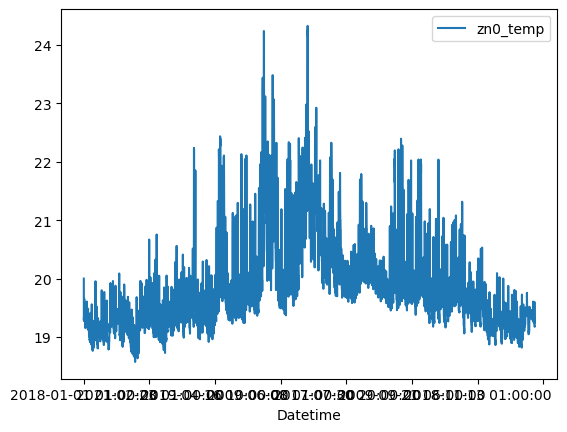

In [46]:
df.plot.line(x='Datetime', y= ['zn0_temp'])

In [44]:
df_memory = pd.read_csv(r'C:\Users\sebas\Documents\GitHub\ClimAIte\EMS_work\agent memory.csv')

In [45]:
df_memory.head()


,Unnamed: 0,state_prev,action,next_reward,next_state,game_over
0,0,[20. 1. 1. 3.2],"[tensor([1.8415], grad_fn=<AddBackward0>)]",-6.52,[19.32045608 1. 1. 3.2 ],False
1,1,[19.32045608 1. 1. 3.2 ],"[tensor([1.7626], grad_fn=<AddBackward0>)]",-10.41,[19.28377007 2. 1. 3. ],False
2,2,[19.28377007 2. 1. 3. ],"[tensor([0.9316], grad_fn=<AddBackward0>)]",-10.71,[19.3168254 3. 1. 2.5 ],False
3,3,[19.3168254 3. 1. 2.5 ],"[tensor([0.1760], grad_fn=<AddBackward0>)]",-10.44,[19.32658982 4. 1. 2.2 ],False
4,4,[19.32658982 4. 1. 2.2 ],"[tensor([-0.5550], grad_fn=<AddBackward0>)]",-10.68,[19.28685268 6. 1. 2.5 ],False
